### étude de cas :

# détection de fraud bancaire : 

source : 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


In [ ]:
# import the necessary packages




# data exploration, 
# premier regard de la donnée, à quoi elle ressemble
data.head()

# Print the shape of the data
# data = data.sample(frac=0.1, random_state = 48)
print(data.shape)
print(data.describe())

# distribution of anomalous features
features = data.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(data[c][data.Class == 1], bins=50)
 sns.distplot(data[c][data.Class == 0], bins=50)
 ax.set_xlabel('’)
 ax.set_title('histogram of feature: ' + str(c))
plt.show()

# Determine number of fraud cases in dataset
Fraud = data[data['Class’] == 1]
Valid = data[data['Class’] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}’.format(len(data[data['Class’] == 1])))
print('Valid Transactions: {}’.format(len(data[data['Class’] == 0])))

# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Charger le dataset récupérer sur Kaggle pour l'inspecter avec la librairie pandas
data = pd.read_csv('creditcard.csv')

In [8]:
# data exploration, 
# premier regard de la donnée, à quoi elle ressemble
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:

print(f' les colonnes du dataset : {data.columns.values}')


 les colonnes du dataset : ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']


Les noms de colonnes ne donnent pas vraiment d'informations. ils ont été "normalisés" en quelque sorte. mis à part Amount et Time ainsi que la colonne qui sera notre target Class.


In [10]:
# Print the shape of the data
# data = data.sample(frac=0.1, random_state = 48)
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

# Déterminons comment les classes sont réparties : 

#### classe 0 : frauduleuse 
#### classe 1 : non frauduleuse 

Outlier fraction: 0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


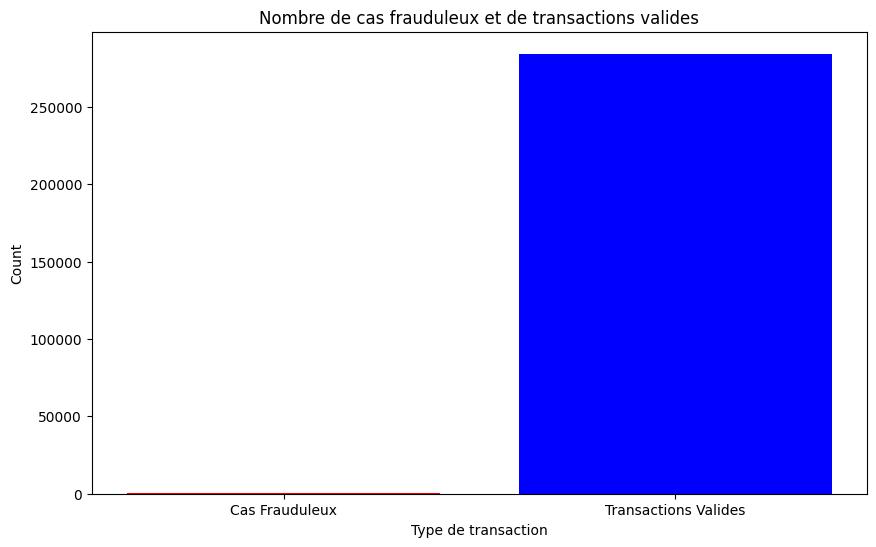

In [24]:
# Determine number of fraud cases in the dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]
outlier_fraction = len(Fraud) / float(len(Valid))

# Print out the numbers
print('Outlier fraction:', outlier_fraction)
print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Transactions: {}'.format(len(Valid)))

# Create a bar chart
labels = ['Cas Frauduleux', 'Transactions Valides']
counts = [len(Fraud), len(Valid)]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['red', 'blue'])
plt.xlabel('Type de transaction')
plt.ylabel('Count')
plt.title('Nombre de cas frauduleux et de transactions valides')
plt.show()

# Visualisation de la donnée

Rien ne vaut un peu de visualisation et des graphiques pour mieux comprendre la donnée et voir comment elle est vraiment répartie.

Comme les deux classes sont largement déséquilibrés, on va plutôt explorer la densité de chacun sur les graphiques ci-dessous

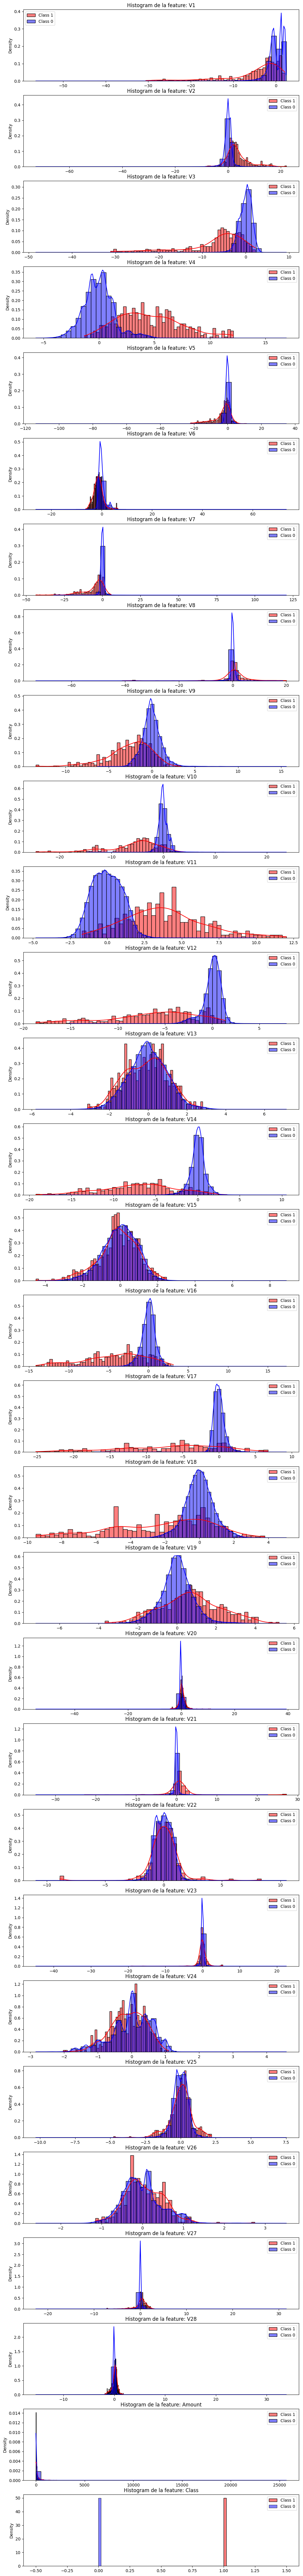

In [17]:
features = data.iloc[:, 1:].columns

plt.figure(figsize=(12, 28 * 4))
gs = gridspec.GridSpec(len(features), 1)

for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.histplot(data[c][data.Class == 1], bins=50, kde=True, color='r', ax=ax, label='Class 1',stat='density')
    sns.histplot(data[c][data.Class == 0], bins=50, kde=True, color='b', ax=ax, label='Class 0',stat='density')
    ax.set_xlabel('')
    ax.set_title('Histogram de la feature: ' + str(c))
    ax.legend()

plt.show()


### Enfin Etudions la correlation des features que nous avons.

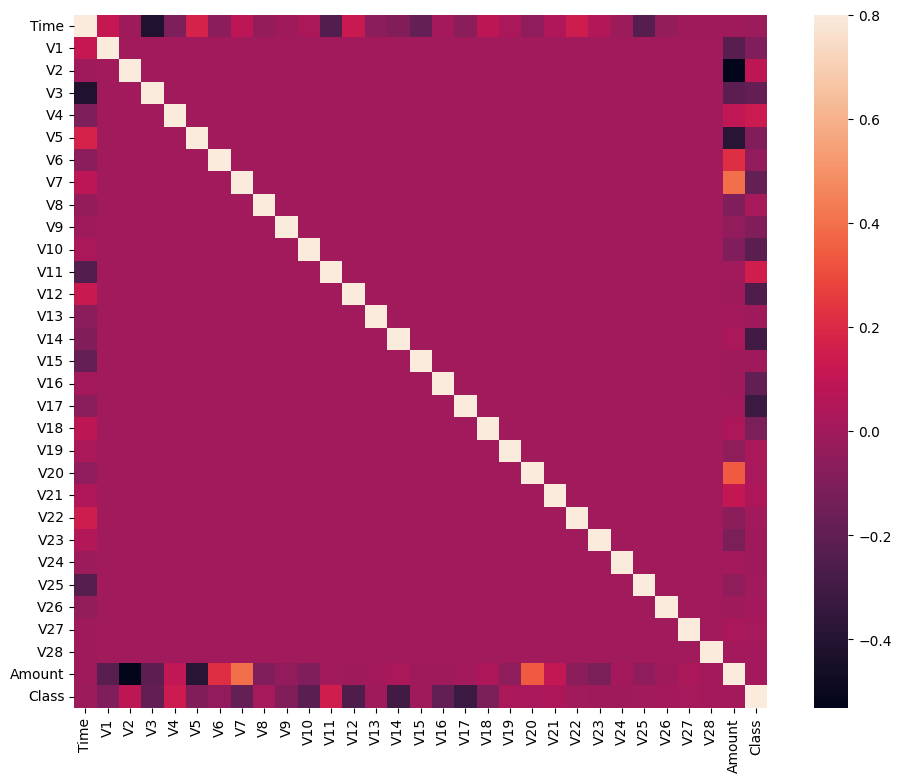

In [25]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Dans la carte thermique (HeatMap), nous pouvons clairement voir que la plupart des caractéristiques ne sont pas corrélées entre elles, mais il y a certaines caractéristiques qui présentent soit une corrélation positive, soit une corrélation négative entre elles. Par exemple, "V2" et "V5" sont fortement négativement corrélées avec la caractéristique appelée "Amount". Nous constatons également une certaine corrélation entre "V20" et "Amount". Cela nous donne une compréhension plus approfondie des données disponibles.